# Clusterização

Equipe :
    * Jéssica Villar - 1613176
    * Fernando Tancini - 1711799
    * Andrea Mourelo - 1820000

Utilizando o dataset1.csv em anexo e desconsiderando a variável target, façam diferentes clusterizações (variando as features, os algoritmos de clustering e suas configurações). Avaliem cada clusterização individualmente e, ao final, façam uma análise comparativa, discutam os resultados e escolham e justifiquem qual foi a melhor clusterização obtida.

# Considerações iniciais

# Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 0.8)
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn import datasets
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')


# Importando os dados

In [2]:
filename = 'dataset1.csv'
data = pd.read_csv(filename)
del data['target']
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33


In [3]:
# sns.pairplot(data)
# plt.show()

Alguns pares de variaveis parecem ter clusters: OU ALGUNS SAO OUTLIERS ??? nseeei
* V1 e V4, V1 e V3, V1 e V5, V1 e V6, V1 e V7, V1 e V8, V1 e V9, V1 e V10, V1 e V12
* V2 e todos os outros
* V3 e V5, V3 e V6, V3 e V7, V3 e V11
* V6 e V7, V6 e V8, V6 e V13
* V8 e V10, V8 e V13

## Análise descritiva

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
V1     506 non-null float64
V2     506 non-null int64
V3     506 non-null float64
V4     506 non-null float64
V5     506 non-null int64
V6     506 non-null float64
V7     506 non-null float64
V8     506 non-null float64
V9     506 non-null float64
V10    506 non-null float64
V11    506 non-null int64
V12    506 non-null float64
V13    506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Todas as colunas do dataframe estão completamente preenchidas e corretamente classificadas ('float','int').

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,0.069170,6.284634,3.795043,408.237154,356.674032,3.613524,11.136779,0.554695,68.574901,9.549407,18.455534,12.653063
std,23.322453,0.253994,0.702617,2.105710,168.537116,91.294864,8.601545,6.860353,0.115878,28.148861,8.707259,2.164946,7.141062
min,0.000000,0.000000,3.561000,1.129600,187.000000,0.320000,0.006320,0.460000,0.385000,2.900000,1.000000,12.600000,1.730000
25%,0.000000,0.000000,5.885500,2.100175,279.000000,375.377500,0.082045,5.190000,0.449000,45.025000,4.000000,17.400000,6.950000
50%,0.000000,0.000000,6.208500,3.207450,330.000000,391.440000,0.256510,9.690000,0.538000,77.500000,5.000000,19.050000,11.360000
75%,12.500000,0.000000,6.623500,5.188425,666.000000,396.225000,3.677082,18.100000,0.624000,94.075000,24.000000,20.200000,16.955000
max,100.000000,1.000000,8.780000,12.126500,711.000000,396.900000,88.976200,27.740000,0.871000,100.000000,24.000000,22.000000,37.970000


É no mínimo curioso as variáveis 'V1' e 'V2' apresentarem o primeiro quartil e o segundo quartil iguais a 0.

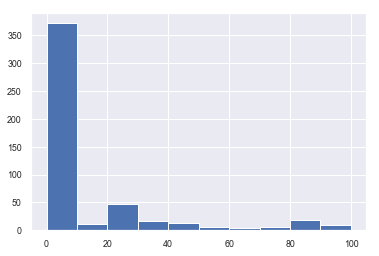

In [6]:
data['V1'].hist()
pass

In [7]:
data['V1'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: V1, dtype: int64

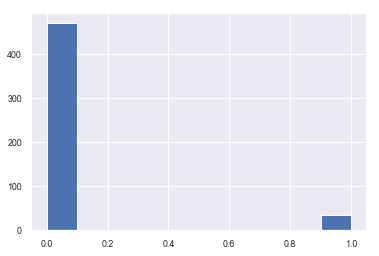

In [8]:
data['V2'].hist()
pass

In [9]:
data['V2'].value_counts()

0    471
1     35
Name: V2, dtype: int64

## Correlação de features

In [10]:
# Calculando a matriz de correlação
corr = data.corr()

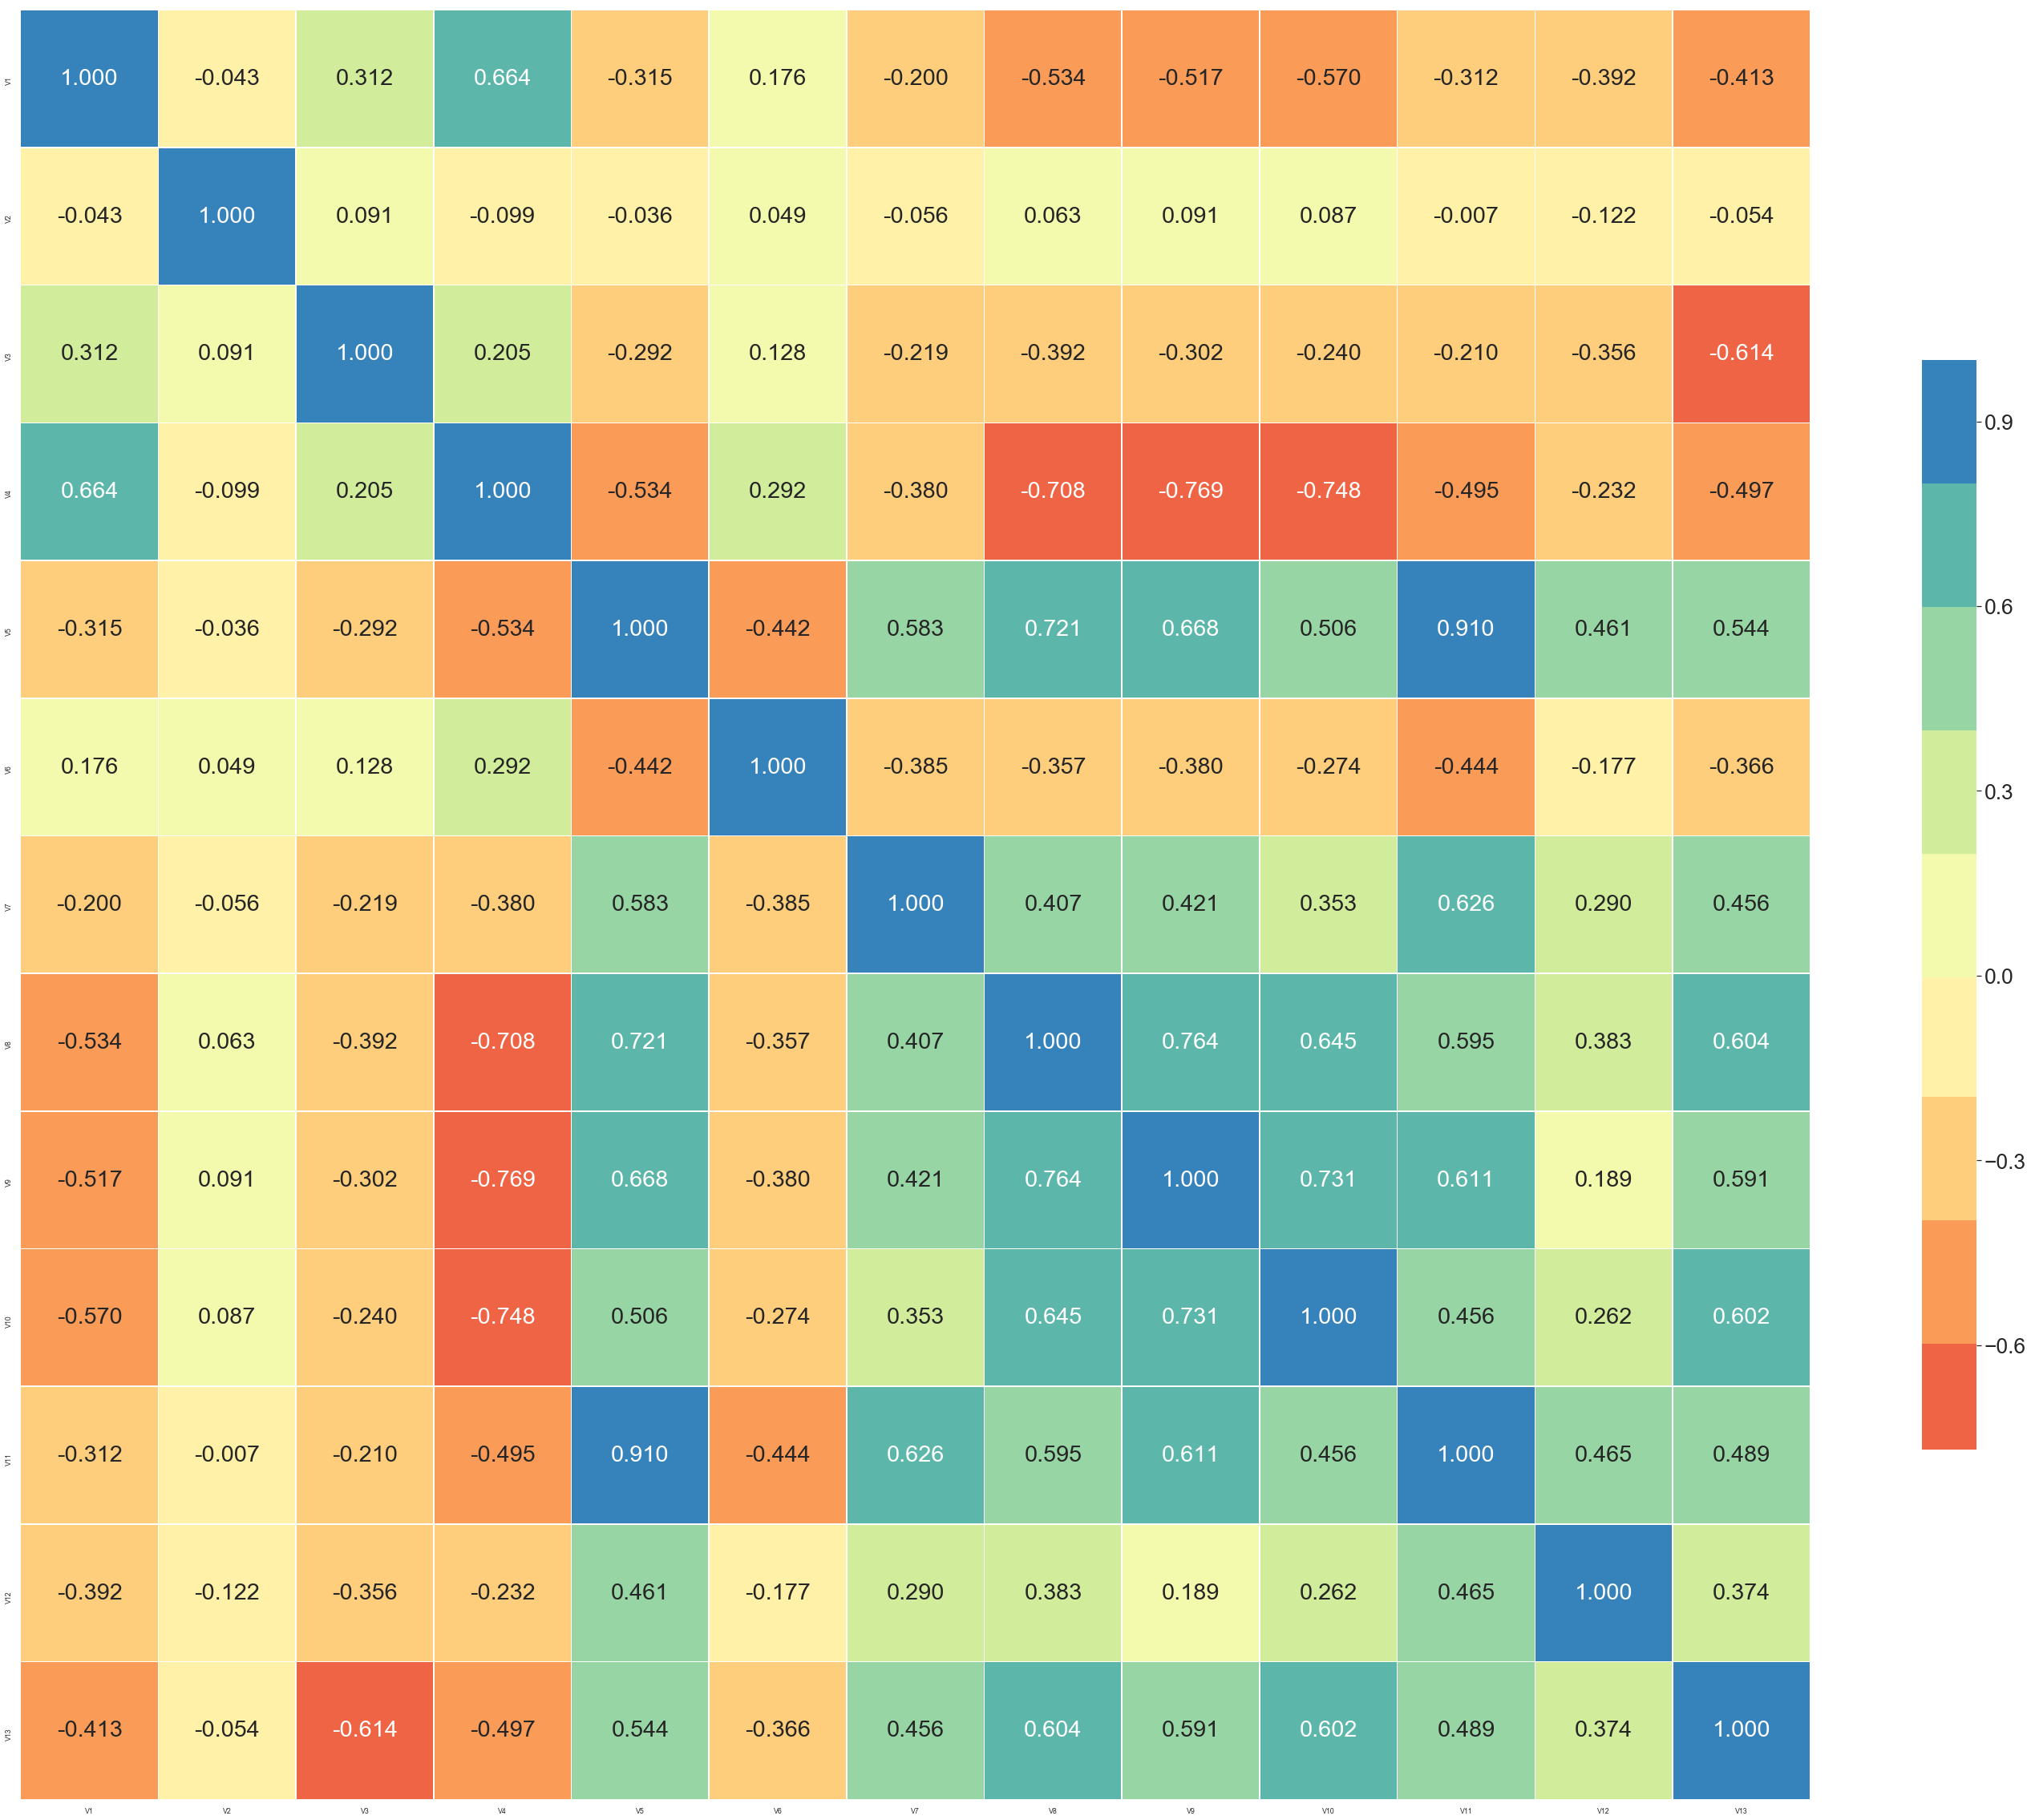

In [11]:
# Montando uma matriz de confusão com as correlações entre todas as variáveis
f, ax = plt.subplots(figsize=(50,50))
cmap = sns.color_palette("Spectral", 10)

sns.set(font_scale=2.4)

ax = sns.heatmap(corr, cmap=cmap, center=0, annot=True, fmt='.3f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Algoritmos usados

In [12]:
def eval_k_means(estimator, name, data, k):
    t0 = time()
    estimator.fit(data)
    print('%-10s, k=%d: sil=%0.4f' % (name, k, metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
def ModeloClustering(data_in, features, showSNS = True, printIntermediateResults = True):
    np.random.seed(1001001)
    # standardize data
    data_model = scale(data_in)
    #
    sample_size=len(data_in)
    # 
    best_sil = -999
    #
    worst_sil = 999

    best_estimator_is_agg = False
    agg_neigbors = 0
    worst_estimator_is_agg = False
    worst_agg_neigbors = 0
    best_estimator_is_sc = False
    worst_estimator_is_sc = False
    
    # Varias configuraçoes de KMeans
    if (printIntermediateResults) : print('KMeans:')
    for init in ['k-means++', 'random']:
        for k in range(3,8):
            estimator = KMeans(init=init, n_clusters=k, n_init=10, max_iter=100)
            estimator.fit(data_model)
            sil = metrics.silhouette_score(data_model, estimator.labels_,
                                              metric='euclidean',
                                              sample_size=sample_size)
            if (printIntermediateResults) : print('%-10s, k=%d: sil=%0.4f' % (init, k, sil))
            if sil > best_sil:
                best_estimator = estimator
                best_sil = sil
            if sil < worst_sil:
                worst_estimator = estimator
                worst_sil = sil

    # Varias configuraçoes de Agglomerative Clustering        
    if (printIntermediateResults) : print('\nAgglomerative Clustering:')
    for nClusters in range(2,5):
        for nNeigbors in range(1,nClusters+1):
            connectivity = kneighbors_graph(data_model, n_neighbors=nNeigbors, include_self=False)
            connectivity = 0.5 * (connectivity + connectivity.T)  # make connectivity symmetric
            estimator = AgglomerativeClustering(n_clusters= nClusters, linkage="average", affinity="cityblock", connectivity=connectivity)
            estimator.fit(data_model)
            sil = metrics.silhouette_score(data_model, estimator.labels_,
                                                      metric='euclidean',
                                                      sample_size=sample_size)
            if (printIntermediateResults) : print('clusters=%d, neighbors=%d: sil=%0.4f' % (nClusters, nNeigbors, sil))
            if sil > best_sil:
                best_estimator = estimator
                best_sil = sil
                best_estimator_is_agg = True
                agg_neigbors = nNeigbors
            if sil < worst_sil:
                worst_estimator = estimator
                worst_sil = sil
                worst_estimator_is_agg = True
                worst_agg_neigbors = nNeigbors
    
    # Varias configuraçoes de Spectral Clustering
    if (printIntermediateResults) : print('\nSpectral Clustering:')
    for nClusters in range(2,5):
        estimator = SpectralClustering(n_clusters=nClusters, affinity='nearest_neighbors', assign_labels='kmeans')
        estimator.fit(data_model)
        sil = metrics.silhouette_score(data_model, estimator.labels_,
                                              metric='euclidean',
                                              sample_size=sample_size)
        if (printIntermediateResults) : print('clusters=%d, sil=%0.4f' % (nClusters, sil))
        if sil > best_sil:
            best_estimator = estimator
            best_sil = sil
            best_estimator_is_sc = True
        if sil < worst_sil:
            worst_estimator = estimator
            worst_sil = sil
            worst_estimator_is_sc = True
    
    # print best
    if (best_estimator_is_agg):
        print('\nBest estimator silhouette (Agglomerative Clustering): %0.4f with %d clusters and %d neighbors' % (best_sil, best_estimator.n_clusters, agg_neigbors))
    elif (best_estimator_is_sc):
        print('\nBest estimator silhouette (Spectral Clustering): %0.4f with %d clusters' % (best_sil, best_estimator.n_clusters))
    else :
        print('\nBest estimator silhouette: %0.4f (%d clusters, %s)' % (best_sil, best_estimator.n_clusters, best_estimator.init))
    data_in['cluster'] = best_estimator.labels_
    if (showSNS == True):
        plotClusterFromEstimator(data_in, features, best_estimator)
     # print worst
    if (worst_estimator_is_agg):
        print('\nWorst estimator silhouette (Agglomerative Clustering): %0.4f with %d clusters and %d neighbors' % (worst_sil, worst_estimator.n_clusters, worst_agg_neigbors))
    elif (worst_estimator_is_sc):
        print('\nWorst estimator silhouette (Spectral Clustering): %0.4f with %d clusters' % (worst_sil, worst_estimator.n_clusters))
    else :
        print('\nWorst estimator silhouette: %0.4f (%d clusters, %s)' % (worst_sil, worst_estimator.n_clusters, worst_estimator.init))
    data_in_cp = data_in.copy()
    data_in_cp['cluster'] = worst_estimator.labels_
    if (showSNS == True):
        plotClusterFromEstimator(data_in_cp, features, worst_estimator)
    return (best_estimator, worst_estimator)

In [13]:
def plotClusterFromEstimator(data_in, features, estimator):
    sns.pairplot(data=data_in, vars=features, hue='cluster')
    sns.set(font_scale = 1)
    plt.figsize=(30,30)
    plt.show()

#### Exemplo

KMeans:
k-means++ , k=3: sil=0.3903
k-means++ , k=4: sil=0.3905
k-means++ , k=5: sil=0.3489
k-means++ , k=6: sil=0.3834
k-means++ , k=7: sil=0.3698
random    , k=3: sil=0.3903
random    , k=4: sil=0.3901
random    , k=5: sil=0.3679
random    , k=6: sil=0.3711
random    , k=7: sil=0.3698

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.4570
clusters=2, neighbors=2: sil=0.4529
clusters=3, neighbors=1: sil=0.3832
clusters=3, neighbors=2: sil=0.4401
clusters=3, neighbors=3: sil=0.2060
clusters=4, neighbors=1: sil=0.3825
clusters=4, neighbors=2: sil=0.3528
clusters=4, neighbors=3: sil=-0.0534
clusters=4, neighbors=4: sil=-0.0797

Spectral Clustering:
clusters=2, sil=0.4550
clusters=3, sil=0.3316
clusters=4, sil=0.3825

Best estimator silhouette (Agglomerative Clustering): 0.4570 with 2 clusters and 1 neighbors


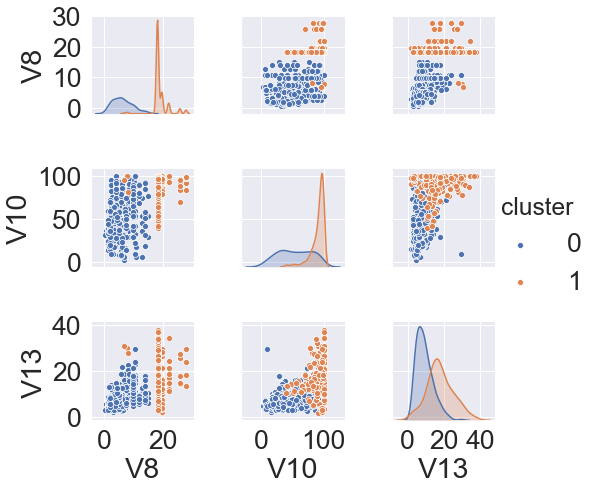


Worst estimator silhouette (Agglomerative Clustering): -0.0797 with 4 clusters and 4 neighbors


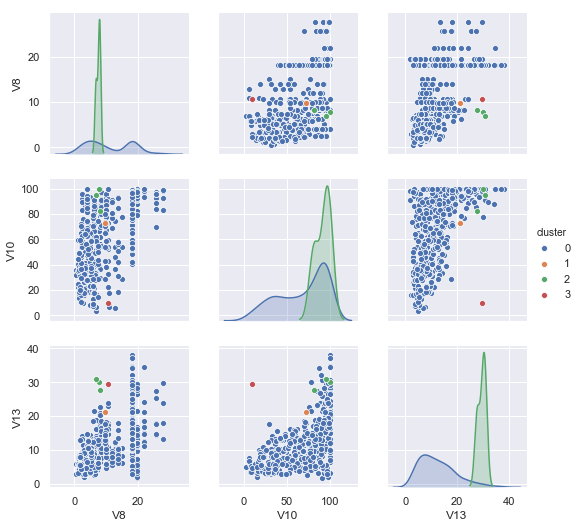

In [14]:
features = ['V8','V10','V13']
data_model_exemplo = data[features]
(modelo_exemplo, _) = ModeloClustering(data_model_exemplo, features,)
#print(data_model_exemplo)

## Modelo 1
### Todas as features

In [15]:
features = list(data.columns)
data_model1 = data.copy()
(modelo1, _) = ModeloClustering(data_model1, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.2574
k-means++ , k=4: sil=0.2898
k-means++ , k=5: sil=0.2478
k-means++ , k=6: sil=0.2922
k-means++ , k=7: sil=0.2698
random    , k=3: sil=0.2574
random    , k=4: sil=0.2898
random    , k=5: sil=0.2478
random    , k=6: sil=0.2965
random    , k=7: sil=0.2538

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.3534
clusters=2, neighbors=2: sil=0.3437
clusters=3, neighbors=1: sil=0.3027
clusters=3, neighbors=2: sil=0.3191
clusters=3, neighbors=3: sil=0.1730
clusters=4, neighbors=1: sil=0.3042
clusters=4, neighbors=2: sil=0.2373
clusters=4, neighbors=3: sil=0.2298
clusters=4, neighbors=4: sil=0.0024

Spectral Clustering:
clusters=2, sil=0.0239
clusters=3, sil=0.1839
clusters=4, sil=0.2511

Best estimator silhouette (Agglomerative Clustering): 0.3534 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.0024 with 4 clusters and 4 neighbors


=> Silhouette ainda pior com todas as features

## Modelo 2

### Apenas features pouco correlacionadas

In [16]:
# Calculando a matriz de correlação
corr = data.corr()
predictors = []
for label, content in corr.iteritems():

    for element in content:
        if ( (element < 0.01) & (element > -0.01)):
            predictors.append([label, content[content == element].index[0], element])
print(predictors)

[['V2', 'V11', -0.007368240886077726], ['V11', 'V2', -0.007368240886077726]]


In [17]:
features = ['V2','V11']
data_model2 = data.copy()
(modelo2, _) = ModeloClustering(data_model2, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.2574
k-means++ , k=4: sil=0.2898
k-means++ , k=5: sil=0.2478
k-means++ , k=6: sil=0.2922
k-means++ , k=7: sil=0.2698
random    , k=3: sil=0.2574
random    , k=4: sil=0.2898
random    , k=5: sil=0.2478
random    , k=6: sil=0.2965
random    , k=7: sil=0.2538

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.3534
clusters=2, neighbors=2: sil=0.3437
clusters=3, neighbors=1: sil=0.3027
clusters=3, neighbors=2: sil=0.3191
clusters=3, neighbors=3: sil=0.1730
clusters=4, neighbors=1: sil=0.3042
clusters=4, neighbors=2: sil=0.2373
clusters=4, neighbors=3: sil=0.2298
clusters=4, neighbors=4: sil=0.0024

Spectral Clustering:
clusters=2, sil=0.0239
clusters=3, sil=0.1839
clusters=4, sil=0.2511

Best estimator silhouette (Agglomerative Clustering): 0.3534 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.0024 with 4 clusters and 4 neighbors


## Redução de dimensionalidade

### PCA - Principal Composant Analysis

In [18]:
from sklearn.decomposition import PCA

In [19]:
def setPCA(data, nDimensions, columns):
    # Precisamos normalizar os dados para usar PCA
    data_scaled = scale(data)
    pca = PCA(n_components=nDimensions)
    principalComponents = pca.fit_transform(data_scaled)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
    return principalDf

#### 2 dimensões

In [20]:
nDimensions = 2
columns = ['Principal Component 1', 'Principal Component 2']
pca2 = setPCA(data,nDimensions,columns)
pca2.head()

,Principal Component 1,Principal Component 2
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712


In [21]:
# Aplicando modelos
features = list(pca2.columns)
data_model_pca2 = pca2.copy()
(modelo_pca2, _) = ModeloClustering(data_model_pca2, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.4743
k-means++ , k=4: sil=0.4694
k-means++ , k=5: sil=0.4350
k-means++ , k=6: sil=0.4450
k-means++ , k=7: sil=0.4174
random    , k=3: sil=0.4743
random    , k=4: sil=0.4699
random    , k=5: sil=0.4347
random    , k=6: sil=0.4446
random    , k=7: sil=0.4163

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.4163
clusters=2, neighbors=2: sil=0.3202
clusters=3, neighbors=1: sil=0.3801
clusters=3, neighbors=2: sil=0.2220
clusters=3, neighbors=3: sil=0.0620
clusters=4, neighbors=1: sil=0.4242
clusters=4, neighbors=2: sil=0.4056
clusters=4, neighbors=3: sil=0.0096
clusters=4, neighbors=4: sil=0.1400

Spectral Clustering:
clusters=2, sil=0.4084
clusters=3, sil=0.4630
clusters=4, sil=0.4678

Best estimator silhouette: 0.4743 (3 clusters, k-means++)

Worst estimator silhouette (Agglomerative Clustering): 0.0096 with 4 clusters and 3 neighbors


0    210
1    166
2    130
Name: cluster, dtype: int64


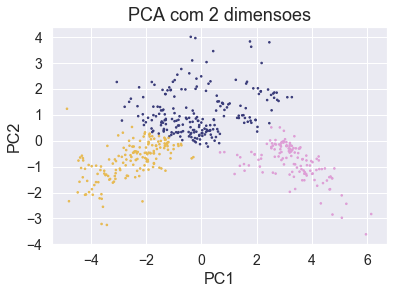

In [22]:
fig,ax = plt.subplots()
plt.scatter(x=data_model_pca2['Principal Component 1'], y=data_model_pca2['Principal Component 2'], marker='.', c=modelo_pca2.labels_, cmap='tab20b', s=10, alpha=1.0)
ax.set_xlabel('PC1', fontsize = 16)
ax.set_ylabel('PC2', fontsize = 16)
ax.set_title('PCA com 2 dimensoes', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print(data_model_pca2.cluster.value_counts())
plt.show()

#### 3 dimensões

In [23]:
nDimensions = 3
columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
pca3 = setPCA(data,nDimensions,columns)
# Aplicando modelos
features = list(pca3.columns)
data_model_pca3 = pca3.copy()
(modelo_pca3, _) = ModeloClustering(data_model_pca3, features, showSNS = False)

KMeans:
k-means++ , k=3: sil=0.3940
k-means++ , k=4: sil=0.4276
k-means++ , k=5: sil=0.3584
k-means++ , k=6: sil=0.3494
k-means++ , k=7: sil=0.3544
random    , k=3: sil=0.3937
random    , k=4: sil=0.4283
random    , k=5: sil=0.3582
random    , k=6: sil=0.3512
random    , k=7: sil=0.3522

Agglomerative Clustering:
clusters=2, neighbors=1: sil=0.4662
clusters=2, neighbors=2: sil=0.4662
clusters=3, neighbors=1: sil=0.2974
clusters=3, neighbors=2: sil=0.2038
clusters=3, neighbors=3: sil=0.3101
clusters=4, neighbors=1: sil=0.2804
clusters=4, neighbors=2: sil=0.2402
clusters=4, neighbors=3: sil=0.3058
clusters=4, neighbors=4: sil=0.4082

Spectral Clustering:
clusters=2, sil=0.3383
clusters=3, sil=0.3453
clusters=4, sil=0.3080

Best estimator silhouette (Agglomerative Clustering): 0.4662 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.2038 with 3 clusters and 2 neighbors


0    502
1      4
Name: cluster, dtype: int64


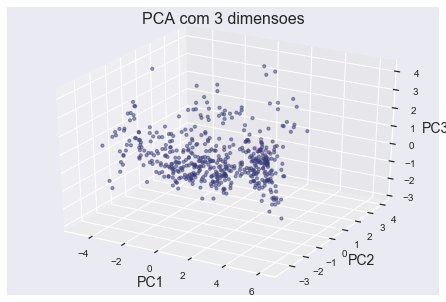

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_model_pca3['Principal Component 1'],data_model_pca3['Principal Component 2'],data_model_pca3['Principal Component 3'],c=modelo_pca3.labels_, cmap='tab20b', s=10, alpha=0.5)
ax.set_xlabel('PC1', fontsize = 14)
ax.set_ylabel('PC2', fontsize = 14)
ax.set_zlabel('PC3', fontsize = 14)
ax.set_title('PCA com 3 dimensoes', fontsize = 16)
ax.tick_params(axis='both',labelsize=10)
print(data_model_pca3.cluster.value_counts())
ax.view_init(30)
plt.draw()

#### de 4 até 10 dimensões

### Considerações finais (PCA)

In [27]:
columns = ['PC 1', 'PC 2', 'PC 3']
modelo_pcai = list(range(11))
features_pca_i = list(range(11))
data_model_pca_i = list(range(11))
for i in range(4,11):
    nDimensions = i
    column = 'PC ' + str(i)
    columns.append(column)
    pca_i[i] = setPCA(data,nDimensions,columns)
    # Aplicando modelos
    features_pca_i[i] = list(pca_i[i].columns)
    data_model_pca_i[i] = pca_i[i].copy()
    print('nDimensions = ', nDimensions)
    (modelo_pcai[i], _) = ModeloClustering(data_model_pca_i[i], features_pca_i[i], showSNS = False, printIntermediateResults = False)
    print('\n')

nDimensions =  4

Best estimator silhouette (Agglomerative Clustering): 0.5093 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.2801 with 4 clusters and 3 neighbors


nDimensions =  5

Best estimator silhouette (Agglomerative Clustering): 0.4595 with 2 clusters and 1 neighbors

Worst estimator silhouette (Agglomerative Clustering): 0.2469 with 4 clusters and 2 neighbors


nDimensions =  6

Best estimator silhouette (Agglomerative Clustering): 0.4190 with 2 clusters and 1 neighbors

Worst estimator silhouette: 0.2720 (3 clusters, random)


nDimensions =  7

Best estimator silhouette (Agglomerative Clustering): 0.6982 with 2 clusters and 2 neighbors

Worst estimator silhouette: 0.2632 (3 clusters, random)


nDimensions =  8

Best estimator silhouette (Agglomerative Clustering): 0.6360 with 2 clusters and 1 neighbors

Worst estimator silhouette: 0.1838 (4 clusters, k-means++)


nDimensions =  9

Best estimator silhouette (Agglomerative Clustering):

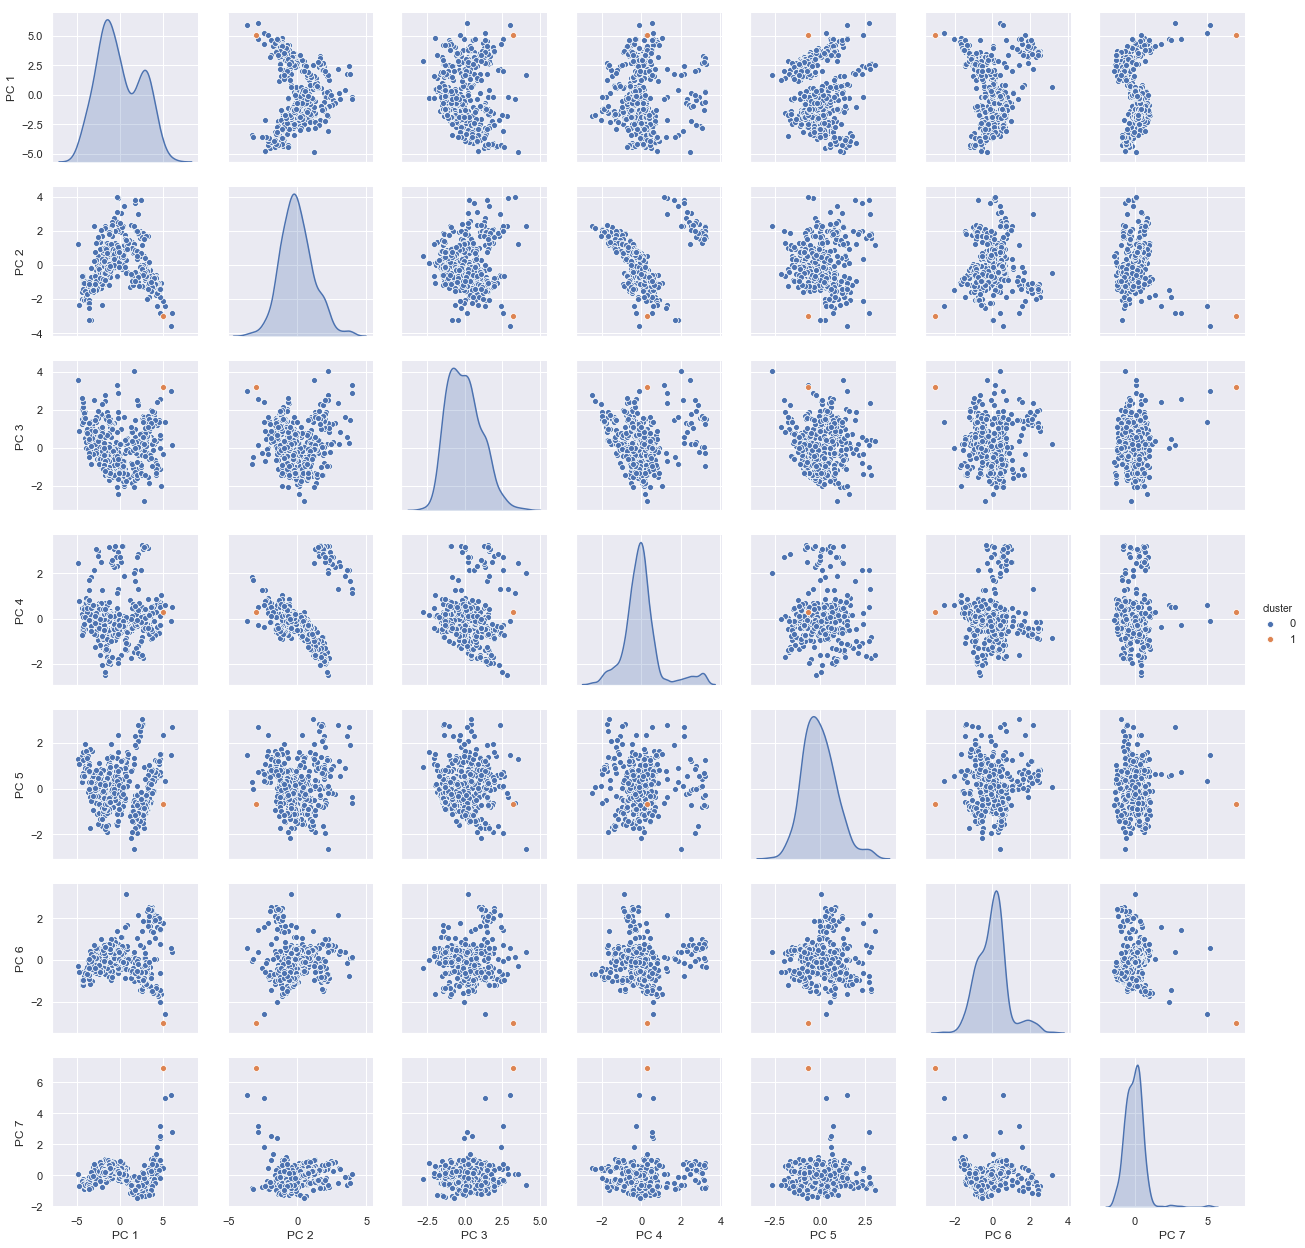

In [28]:
plotClusterFromEstimator(data_model_pca_i[7], features_pca_i[7], modelo_pcai[7])

### MDS - Multidimensional Scaling

### LAMP - Local Affine Multidimensional Projection

### Analise comparativa

### Melhor modelo

### Conclusão